Project Summary: Dermatology Disease Classification Using Random Forest
🧠 1. Project Overview

The goal of this project is to build a machine learning model that can accurately classify different types of dermatological diseases based on a set of clinical and histopathological features.
The dataset used is the Dermatology dataset (from the UCI Machine Learning Repository), which contains 34 attributes describing various skin characteristics and one target variable representing the disease type.

In [67]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [41]:
# Read Excel
df = pd.read_csv(r"C:\Users\chris\Downloads\dataset_35_dermatology (1).csv")

# Display dataframe 
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [43]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [44]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [45]:
df.duplicated().sum()

0

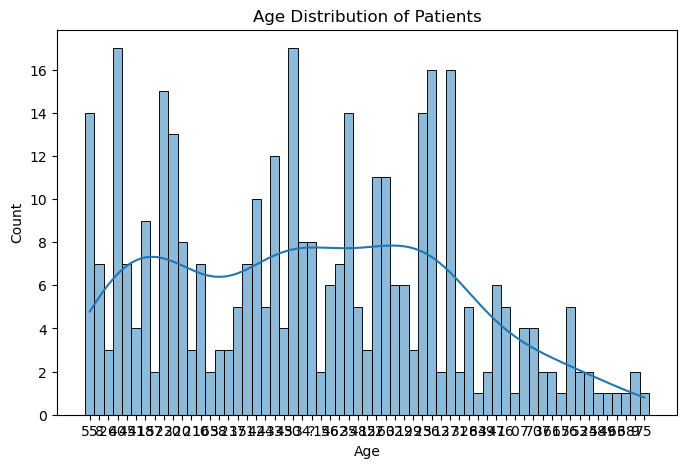

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

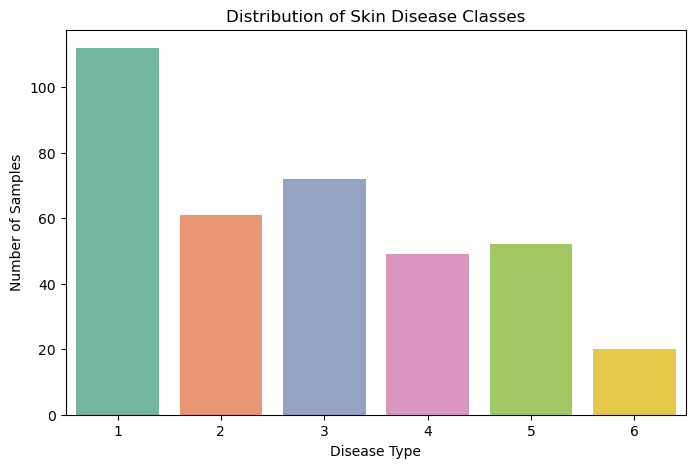

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Distribution of Skin Disease Classes")
plt.xlabel("Disease Type")
plt.ylabel("Number of Samples")
plt.show()

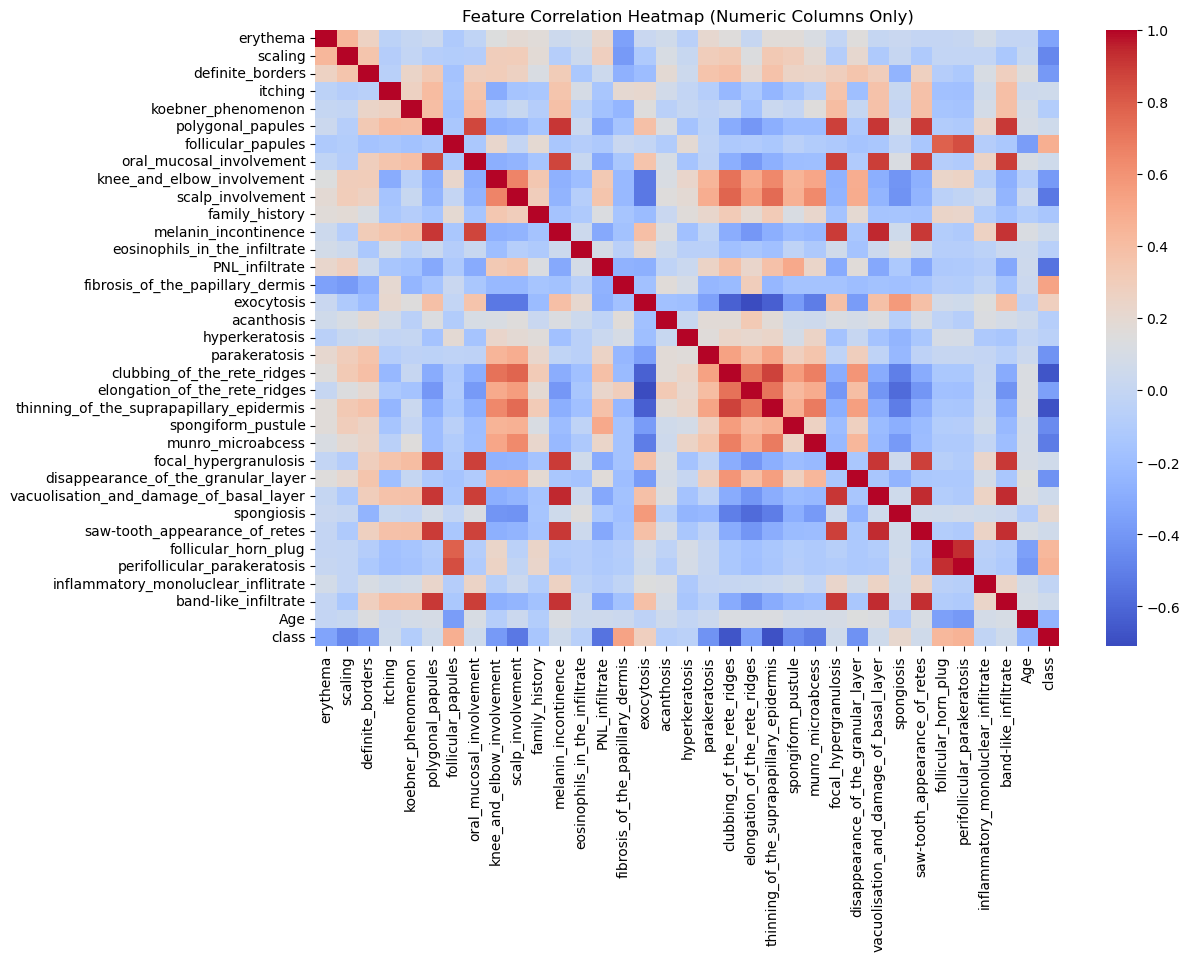

In [48]:
# Convert non-numeric to NaN and then select numeric columns only
df_numeric = df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [49]:
print(df.columns.tolist())


['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate', 'band-like_infiltrate', 'Age', 'class']


In [50]:
# Strip spaces and lowercase all column names for safety
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())  # Check cleaned names


['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'pnl_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate', 'band-like_infiltrate', 'age', 'class']


In [51]:


# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Convert everything numeric where possible
df = df.apply(pd.to_numeric, errors='ignore')

# Handle age column only if it exists
if 'age' in df.columns:
    df['age'] = df['age'].astype(float)
    df['age'].fillna(df['age'].mean(), inplace=True)
else:
    print("⚠️ No 'age' column found in dataset.")


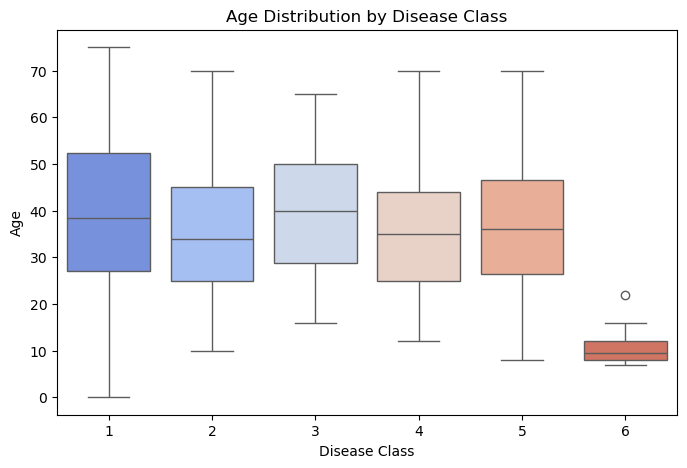

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='age', data=df, palette='coolwarm')
plt.title("Age Distribution by Disease Class")
plt.xlabel("Disease Class")
plt.ylabel("Age")
plt.show()


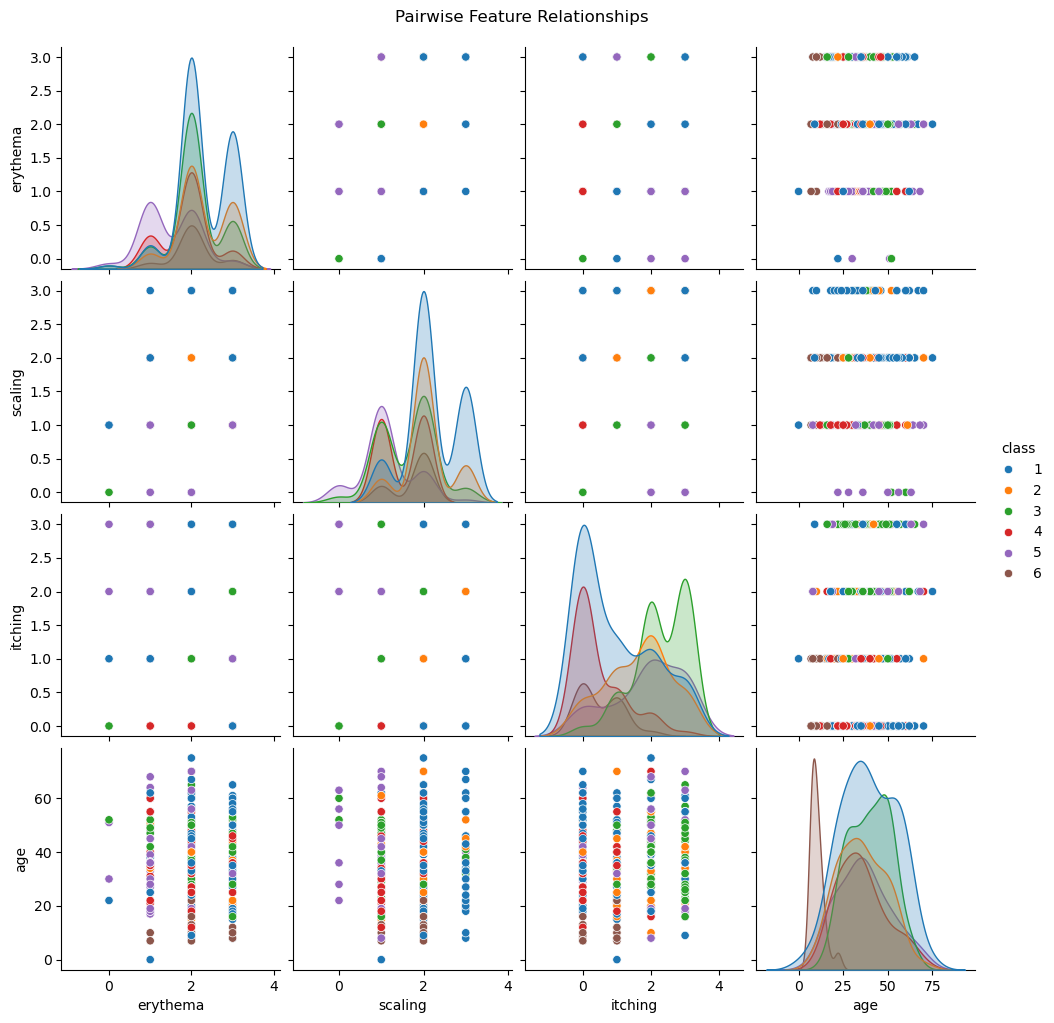

In [53]:
selected_features = ['erythema', 'scaling', 'itching', 'age', 'class']
sns.pairplot(df[selected_features], hue='class', palette='tab10', diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


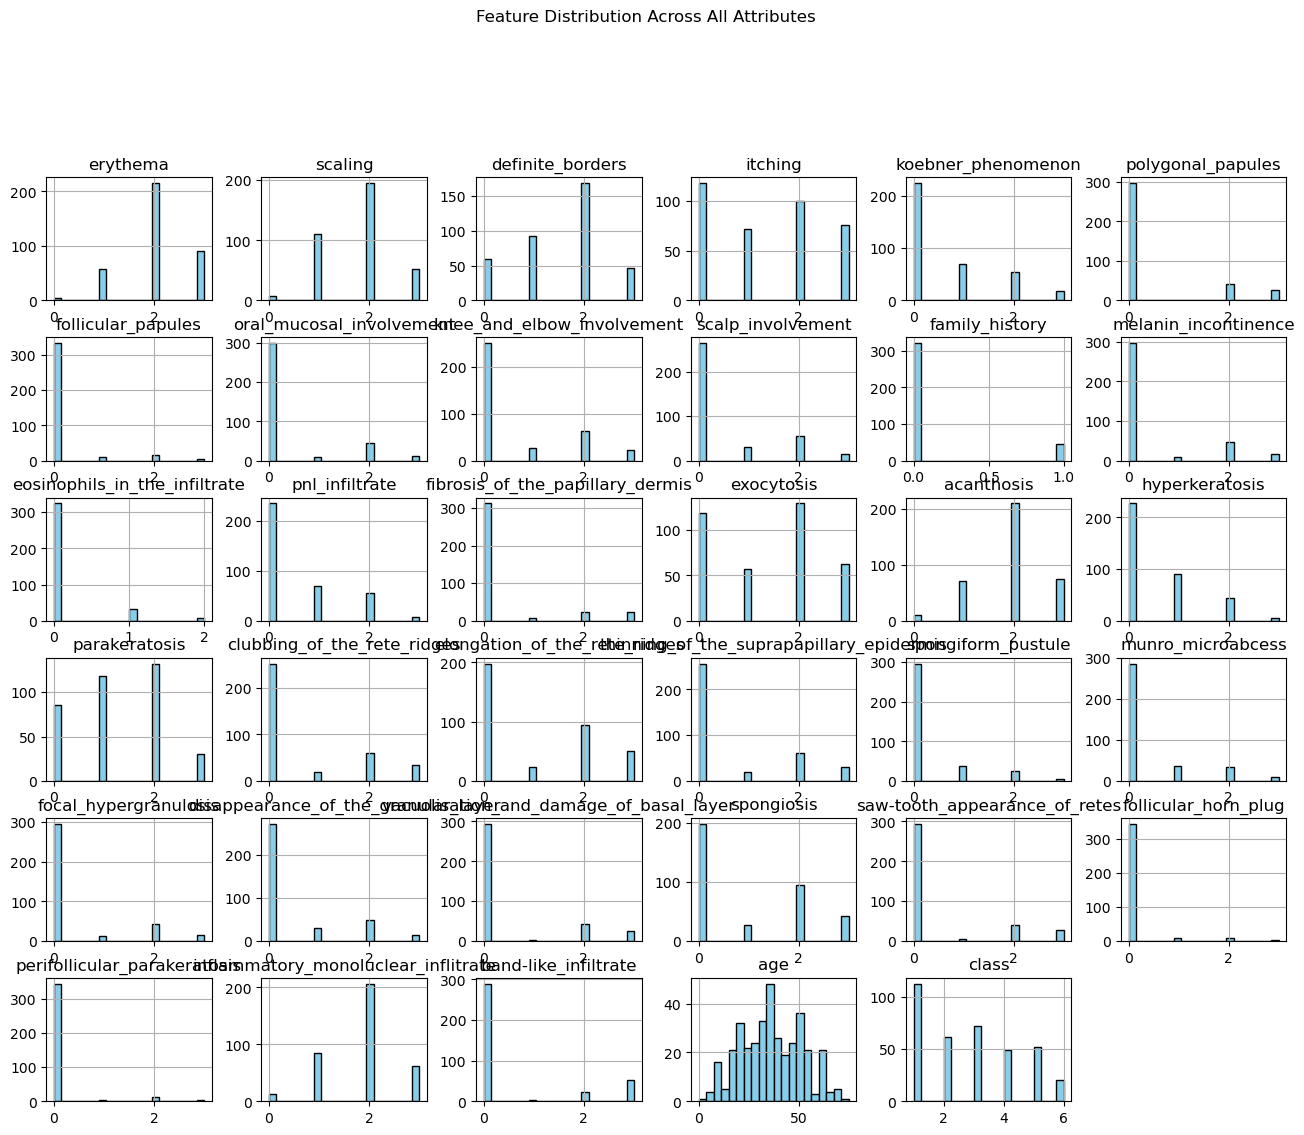

In [54]:
df_numeric = df.select_dtypes(include=[np.number])

df_numeric.hist(figsize=(16,12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distribution Across All Attributes", y=1.02)
plt.show()


The Dermatology Dataset is used to classify different types of skin diseases based on clinical and histopathological features. It contains information collected from patients, including symptoms such as redness, scaling, itching, and other skin characteristics. The dataset consists of 34 input attributes and one target class representing six different dermatological conditions.

This dataset helps in developing machine learning models that can support doctors in diagnosing skin diseases more accurately and efficiently.

In [55]:
# Step 2: Data Cleaning
df.replace("?", np.nan, inplace=True)         # Replace '?' with NaN
df.columns = df.columns.str.strip().str.lower()  # Clean column names

In [56]:
# Convert numeric columns
df = df.apply(pd.to_numeric, errors='ignore')


In [57]:
# If 'age' column exists, convert and fill missing values
if 'age' in df.columns:
    df['age'] = df['age'].astype(float)
    df['age'].fillna(df['age'].mean(), inplace=True)

In [58]:
# Check that 'class' column exists
if 'class' not in df.columns:
    raise ValueError("❌ 'class' column not found in dataset. Check df.columns to confirm column name.")

In [ ]:
# Step 3: Split features and target
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
# Convert all features to numeric (safety)
X = X.apply(pd.to_numeric, errors='coerce')

# Step 4: Split dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 5: Train Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,        # number of trees
    random_state=42,         # reproducibility
    max_depth=None,          # full depth trees
    n_jobs=-1                # use all CPU cores
)
rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# Step 6: Predictions
y_pred = rf.predict(X_test)


In [ ]:
# Step 7: Evaluation
print("✅ Random Forest Model Evaluation")
print("---------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Random Forest Model Evaluation
---------------------------------
Accuracy: 98.65%

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



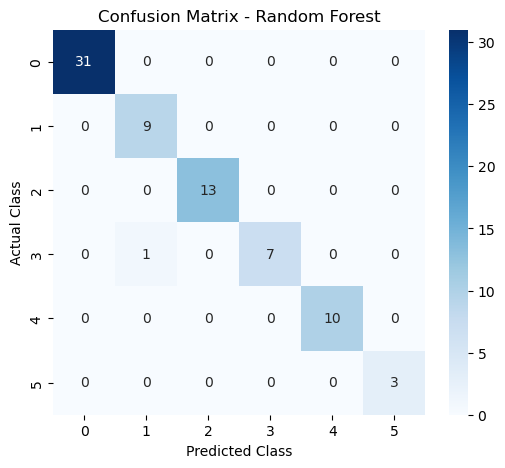

In [64]:
# 🧾 Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()


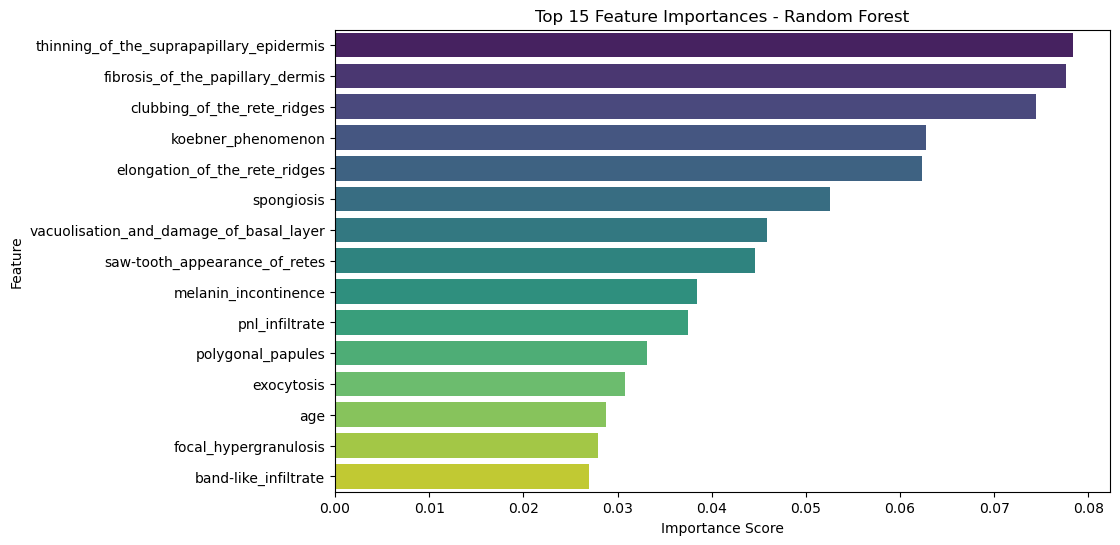

In [65]:
# 🌟 Step 8: Feature Importance Plot
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:15], y=importances.index[:15], palette='viridis')
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. It works by finding the optimal hyperplane that best separates different classes in the feature space. SVM focuses on maximizing the margin between data points of different classes, ensuring better generalization and robustness to noise.

SVM can use different kernel functions (such as linear, polynomial, or RBF) to transform non-linear data into higher dimensions, making it linearly separable. This flexibility allows SVM to handle complex, high-dimensional datasets effectively. However, SVM can be computationally intensive and sensitive to parameter tuning, especially with large or noisy datasets.

In [ ]:
#Step 1: Prepare data
X = df.drop('class', axis=1)
y = df['class']

# Convert features to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
#Step 2: Initialize and train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [70]:
#Step 3: Predict
y_pred_svm = svm_model.predict(X_test)

In [71]:
#Step 4: Evaluate
print("✅ Support Vector Machine (SVM) Model Evaluation")
print("-----------------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

✅ Support Vector Machine (SVM) Model Evaluation
-----------------------------------------------
Accuracy: 72.97%

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.97      0.95        31
           2       0.35      1.00      0.51         9
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.73        74
   macro avg       0.49      0.61      0.52        74
weighted avg       0.64      0.73      0.66        74



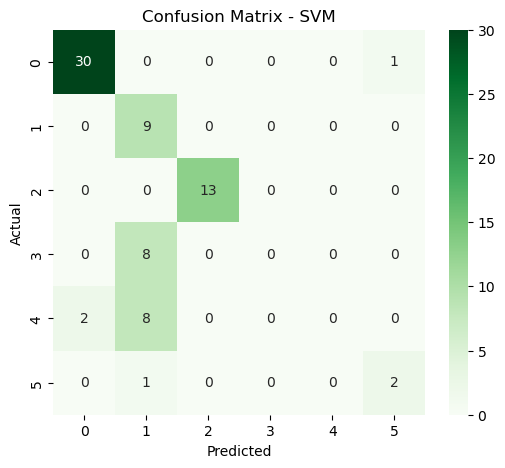

In [72]:
#Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='g', cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The Random Forest Classifier achieved an outstanding accuracy of 98.65%, significantly outperforming the Support Vector Machine (SVM), which achieved 72.97%. This demonstrates that Random Forest is far more effective for the dermatology dataset, as it can handle non-linear relationships, noisy data, and complex feature interactions with high robustness. In contrast, the SVM model struggled to generalize across all disease classes, likely due to the dataset’s non-linear separability and limited size. Overall, Random Forest proved to be the most accurate, stable, and interpretable model, making it the best choice for dermatological disease classification and a strong example of how machine learning can enhance diagnostic accuracy in healthcare.